In [41]:
from ase.io import read, write
from ase.atoms import Atoms
from pyace import PyACECalculator
from ase.build import cut, bulk, surface, molecule
from ase.build.tools import sort
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib as mpl
plt.style.use('~/plot.mplstyle')
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['mathtext.default']='regular'
from ase.filters import UnitCellFilter
from ase.optimize import BFGS
from quippy.potential import Potential
cm=1/2.54

In [42]:
potfilename='../../models/SiH-ACE-25.yaml'
calc=PyACECalculator(potfilename)

In [43]:
gap18=Potential(param_filename='../../models/GAP18/gp_iter6_sparse9k.xml')

In [44]:
gap22=Potential(param_filename='../../models/GAP22/GAP_Si_H_PRM.xml')

In [45]:
dft_ref_e={'Si':-4.14594262, 'H':0.10877632} 

In [46]:
## References

In [47]:
bulk_dft=read('../../data/paper/c-surfaces/bulk/OUTCAR')
bulk_dft_en=bulk_dft.get_potential_energy()/(len(bulk_dft))

In [48]:
h_atom = Atoms('H', positions=[[0, 0, 0]], cell=[20, 20, 20], pbc=[False, False, False])
h_atom.calc=calc
H_isolated_ace=h_atom.get_potential_energy()

In [49]:
h_atom = Atoms('H', positions=[[0, 0, 0]], cell=[20, 20, 20], pbc=[False, False, False])
h_atom.calc=gap22
H_isolated_gap22=h_atom.get_potential_energy()

In [50]:
mol=read('../../data/paper/c-surfaces/H2/OUTCAR', format='vasp-out')
mol_en_dft=mol.get_potential_energy()/len(mol)

In [51]:
mol=read('../../data/paper/c-surfaces/H2/POSCAR_H2')
mol.calc=calc
ucf = UnitCellFilter(mol, hydrostatic_strain=True)
opt = BFGS(ucf)
opt.run(fmax=0.001)
mol_en_ace=mol.get_potential_energy()/len(mol)

      Step     Time          Energy          fmax
BFGS:    0 15:49:05       -5.933693        0.390441
BFGS:    1 15:49:05       -5.935310        0.112872
BFGS:    2 15:49:05       -5.935450        0.003123
BFGS:    3 15:49:05       -5.935450        0.000024


In [52]:
bulk_ace=read('../../data/paper/c-surfaces/bulk/bulk_ace_relaxed.xyz')
bulk_ace.calc=calc
ucf = UnitCellFilter(bulk_ace, hydrostatic_strain=True)
opt = BFGS(ucf)
opt.run(fmax=0.001)
bulk_ace_en=bulk_ace.get_potential_energy()/len(bulk_ace)

      Step     Time          Energy          fmax
BFGS:    0 15:49:05     -374.885362        0.000028


In [53]:
bulk_gap18=read('../../data/paper/c-surfaces/bulk/bulk_ace_relaxed.xyz')
bulk_gap18.calc=gap18
ucf = UnitCellFilter(bulk_gap18, hydrostatic_strain=True)
opt = BFGS(ucf)
opt.run(fmax=0.001)
bulk_gap18_en=bulk_gap18.get_potential_energy()/len(bulk_gap18)

      Step     Time          Energy          fmax
BFGS:    0 15:49:05   -10443.133610        0.292583
BFGS:    1 15:49:05   -10443.137264        0.290231
BFGS:    2 15:49:05   -10443.278011        0.179508
BFGS:    3 15:49:06   -10443.353365        0.072241
BFGS:    4 15:49:06   -10443.368293        0.001901
BFGS:    5 15:49:06   -10443.368304        0.000021


In [54]:
mol=read('../../data/paper/c-surfaces/H2/POSCAR_H2')
mol.calc=gap22
ucf = UnitCellFilter(mol, hydrostatic_strain=True)
opt = BFGS(ucf)
opt.run(fmax=0.001)
mol_en_gap22=mol.get_potential_energy()/len(mol)

      Step     Time          Energy          fmax
BFGS:    0 15:49:06      -26.447676        0.670583
BFGS:    1 15:49:06      -26.457027        0.282963
BFGS:    2 15:49:06      -26.459032        0.002220
BFGS:    3 15:49:06      -26.459032        0.000001


In [55]:
bulk_gap22=read('../../data/paper/c-surfaces/bulk/bulk_ace_relaxed.xyz')
bulk_gap22.calc=gap22
ucf = UnitCellFilter(bulk_gap22, hydrostatic_strain=True)
opt = BFGS(ucf)
opt.run(fmax=0.001)
bulk_gap22_en=bulk_gap22.get_potential_energy()/len(bulk_gap22)

      Step     Time          Energy          fmax
BFGS:    0 15:49:07    -6858.232064        0.256254
BFGS:    1 15:49:07    -6858.234867        0.254206
BFGS:    2 15:49:07    -6858.354061        0.143475
BFGS:    3 15:49:08    -6858.407478        0.034948
BFGS:    4 15:49:08    -6858.410896        0.000473


### Si 100 and 110

In [56]:
surfaces = ['Si/100', 'Si/110']

unrelaxed_dft={}
unrelaxed_ace={}
unrelaxed_gap={}
relaxed_dft={}
relaxed_ace={}
relaxed_gap={}


for surface in surfaces:
    unrelaxed=read(f'../../data/paper/c-surfaces/{surface}/unrelaxed/OUTCAR')
    unrelaxed_area=unrelaxed.cell[0,0]*unrelaxed.cell[1,1]

    unrelaxed_dft_en=unrelaxed.get_potential_energy()
    gamma_unrelaxed_dft=(unrelaxed_dft_en-bulk_dft_en*len(unrelaxed))/(2*unrelaxed_area)
    unrelaxed_dft[surface]=gamma_unrelaxed_dft
    
    unrelaxed.calc=calc
    unrelaxed_ace_en=unrelaxed.get_potential_energy()
    gamma_unrelaxed_ace=(unrelaxed_ace_en-bulk_ace_en*len(unrelaxed))/(2*unrelaxed_area)
    unrelaxed_ace[surface]=gamma_unrelaxed_ace

    unrelaxed.calc=gap18
    unrelaxed_gap_en=unrelaxed.get_potential_energy()
    gamma_unrelaxed_gap=(unrelaxed_gap_en-bulk_gap18_en*len(unrelaxed))/(2*unrelaxed_area)
    unrelaxed_gap[surface]=gamma_unrelaxed_gap


    relaxed=read(f'../../data/paper/c-surfaces/{surface}/relaxed/OUTCAR')
    relaxed_area=relaxed.cell[0,0]*relaxed.cell[1,1]

    relaxed_dft_en=relaxed.get_potential_energy()
    gamma_relaxed_dft=(relaxed_dft_en-bulk_dft_en*len(relaxed))/(2*relaxed_area)
    relaxed_dft[surface]=gamma_relaxed_dft

    
    relaxed.calc=calc
    relaxed_ace_en=relaxed.get_potential_energy()
    gamma_relaxed_ace=(relaxed_ace_en-bulk_ace_en*len(relaxed))/(2*relaxed_area)
    relaxed_ace[surface]=gamma_relaxed_ace

    relaxed.calc=gap18
    ucf = UnitCellFilter(relaxed, hydrostatic_strain=True)
    opt = BFGS(ucf)
    opt.run(fmax=0.001)
    relaxed_gap_en=relaxed.get_potential_energy()
    gamma_relaxed_gap=(relaxed_gap_en-bulk_gap18_en*len(relaxed))/(2*relaxed_area)
    relaxed_gap[surface]=gamma_relaxed_gap
    


      Step     Time          Energy          fmax
BFGS:    0 15:49:09   -20866.517623        0.181040
BFGS:    1 15:49:10   -20866.533881        0.144638
BFGS:    2 15:49:10   -20866.564914        0.134804
BFGS:    3 15:49:11   -20866.569683        0.133674
BFGS:    4 15:49:12   -20866.606214        0.119211
BFGS:    5 15:49:14   -20866.618080        0.111403
BFGS:    6 15:49:14   -20866.633161        0.124223
BFGS:    7 15:49:15   -20866.650076        0.144794
BFGS:    8 15:49:15   -20866.673494        0.142710
BFGS:    9 15:49:16   -20866.692609        0.099457
BFGS:   10 15:49:16   -20866.705848        0.100288
BFGS:   11 15:49:18   -20866.714561        0.084600
BFGS:   12 15:49:18   -20866.720349        0.047954
BFGS:   13 15:49:19   -20866.722991        0.028878
BFGS:   14 15:49:19   -20866.723844        0.029777
BFGS:   15 15:49:20   -20866.724249        0.022600
BFGS:   16 15:49:20   -20866.724621        0.017125
BFGS:   17 15:49:21   -20866.724928        0.015921
BFGS:   18 15:

In [57]:
experimental_100_r=1.36/16.022
experimental_110_r=1.43/16.022

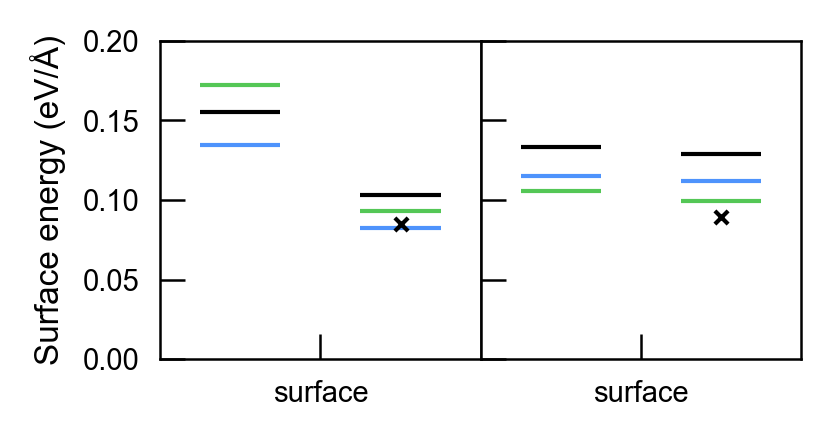

In [58]:
# Surface labels and data
cm=1/2.54

x = np.arange(len(surfaces)*2)
fig, axes = plt.subplots(1,2, figsize=(7*cm, 3.5*cm), sharey=True, sharex=True)


for i in range(len(surfaces)):
    surface=surfaces[i]
    axes[i].hlines(unrelaxed_dft[surface],-0.2,  0.2, color='black')
    axes[i].hlines(unrelaxed_ace[surface], -0.2,  0.2, color="#54C756")
    axes[i].hlines(unrelaxed_gap[surface], -0.2,  0.2, color='#4E93FC')
    axes[i].hlines(relaxed_ace[surface], 0.6, 1, color="#54C756")
    axes[i].hlines(relaxed_dft[surface], 0.6, 1, color='black')
    axes[i].hlines(relaxed_gap[surface],  0.6, 1, color='#4E93FC')
    axes[i].scatter(0.8, np.asarray((experimental_100_r, experimental_110_r))[i], color='k', marker='x', s=10, zorder=10, label='Exp')

axes[0].set_xticks([0.4])
axes[0].set_xlim(left=-0.4, right=1.2)
axes[0].set_xticklabels(['surface'])
axes[0].set_ylim(0, 0.2)
axes[0].set_yticks(np.arange(0, 0.25,0.05))


axes[0].set_ylabel('Surface energy (eV/Å)')
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig('Si_energies_v3.svg', dpi=300)

### SiH 100, 110 and 111

In [59]:
surfaces = ['SiH/100', 'SiH/111']

bare_ace={}
bare_gap={}
half_ace={}
half_gap={}
Hcovered_ace={}
Hcovered_gap={}


for surface in surfaces:
    # centrosymmetric bare surface energy
    bare=read(f'../../data/paper/c-surfaces/{surface}/bare.xyz')
    bare_area=bare.cell[0,0]*bare.cell[1,1]
    
    bare.calc=calc
    ucf = UnitCellFilter(bare, hydrostatic_strain=True)
    opt = BFGS(ucf)
    opt.run(fmax=0.001)
    bare_en_ace=bare.get_potential_energy()
    gamma_bare_ace=(bare_en_ace-bulk_ace_en*len(bare))/(2*bare_area)
    bare_ace[surface]=gamma_bare_ace

    bare=read(f'../../data/paper/c-surfaces/{surface}/bare.xyz')
    bare.calc=gap22
    ucf = UnitCellFilter(bare, hydrostatic_strain=True)
    opt = BFGS(ucf)
    opt.run(fmax=0.001)
    
    bare_en_gap=bare.get_potential_energy()
    gamma_bare_gap=(bare_en_gap-bulk_gap22_en*len(bare))/(2*bare_area)
    bare_ace[surface]=gamma_bare_gap

    half=read(f'../../data/paper/c-surfaces/{surface}/half_covered.xyz')
    half_area=half.cell[0,0]*half.cell[1,1]
    
    half.calc=calc
    ucf = UnitCellFilter(half, hydrostatic_strain=True)
    opt = BFGS(ucf)
    opt.run(fmax=0.001)
    half_en_ace=half.get_potential_energy()
    gamma_half_ace=(half_en_ace-bulk_ace_en*len(half[half.numbers==14])-H_isolated_ace*len(half[half.numbers==1]))/(2*half_area)
    half_ace[surface]=gamma_half_ace
    Hcovered_ace[surface]=gamma_half_ace-gamma_bare_ace
    write(f'../../data/paper/c-surfaces/{surface}/half_covered-relaxed-ace.xyz', half)

    half=read(f'../../data/paper/c-surfaces/{surface}/half_covered.xyz')
    half_area=half.cell[0,0]*half.cell[1,1]
    
    half.calc=gap22
    ucf = UnitCellFilter(half, hydrostatic_strain=True)
    opt = BFGS(ucf)
    opt.run(fmax=0.001)
    half_en_gap=half.get_potential_energy()
    gamma_half_gap=(half_en_gap-bulk_gap22_en*len(half[half.numbers==14])-H_isolated_gap22*len(half[half.numbers==1]))/(2*half_area)
    half_gap[surface]=gamma_half_gap
    Hcovered_gap[surface]=gamma_half_gap-gamma_bare_gap
    write(f'../../data/paper/c-surfaces/{surface}/half_covered-relaxed-gap.xyz', half)


      Step     Time          Energy          fmax
BFGS:    0 15:50:49     -713.799618        3.518871
BFGS:    1 15:50:50     -715.761840        1.119393
BFGS:    2 15:50:50     -716.261686        0.730648
BFGS:    3 15:50:50     -716.678609        0.289014
BFGS:    4 15:50:50     -716.755334        0.220851
BFGS:    5 15:50:50     -716.799773        0.216269
BFGS:    6 15:50:50     -716.865413        0.229961
BFGS:    7 15:50:51     -716.941486        0.258066
BFGS:    8 15:50:51     -717.017538        0.241924
BFGS:    9 15:50:51     -717.087942        0.241548
BFGS:   10 15:50:51     -717.150914        0.214740
BFGS:   11 15:50:51     -717.216697        0.212949
BFGS:   12 15:50:52     -717.288870        0.213561
BFGS:   13 15:50:52     -717.360770        0.245694
BFGS:   14 15:50:52     -717.435887        0.224020
BFGS:   15 15:50:52     -717.506776        0.182460
BFGS:   16 15:50:52     -717.556191        0.157234
BFGS:   17 15:50:52     -717.580086        0.145973
BFGS:   18 15:

In [60]:
# Stekolnikov DFT
dft_100=-5.34/16.022
dft_110=-3.61/16.022
dft_111=-3.03/16.022


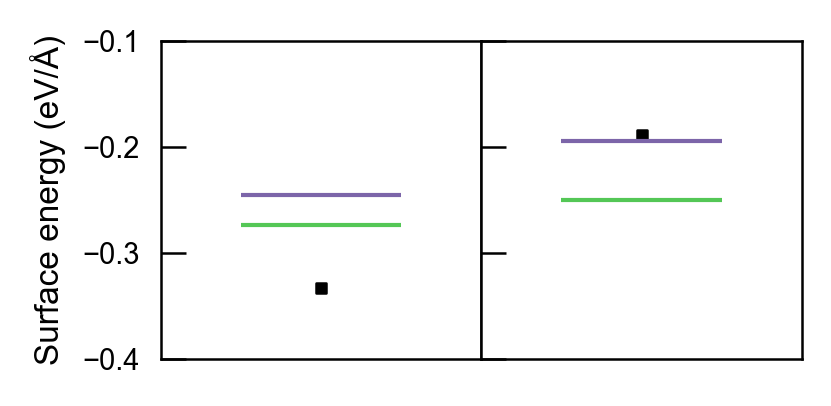

In [61]:

cm=1/2.54
surfaces=['SiH/100', 'SiH/111']

x = np.arange(len(surfaces))

fig, axes = plt.subplots(1,2, figsize=(7*cm, 3.5*cm), sharey=True, sharex=True)

axes[0].scatter(0, dft_100, color='k', label='DFT', marker='s', s=5)
axes[1].scatter(0,dft_111, color='k', label='DFT', marker='s', s=5)

for i in range(len(surfaces)):
    surface=surfaces[i]
    
    axes[i].hlines(Hcovered_ace[surface], -0.2,  0.2, color="#54C756", label='ace-25')
    axes[i].hlines(Hcovered_gap[surface],  -0.2, 0.2, color='#7C65A9', label='gap-18')


axes[0].set_xticks([])
# axes.set_xticklabels(surfaces)
axes[0].set_xlim(left=-0.4, right=0.4)
axes[0].set_ylim(top=-0.15, bottom=-0.4)
axes[0].set_yticks(np.arange(-0.4, -0.1, 0.1))
plt.subplots_adjust(wspace=0, hspace=0)

axes[0].set_ylabel('Surface energy (eV/Å)')
plt.savefig('SiH_energies_v3.svg', dpi=300)

#### Si 111 reconstructions

In [62]:
# DFT reference is https://pubs.acs.org/doi/pdf/10.1021/la052029s?ref=article_openPDF
dft_111_r=1.5661764705882355
dft_3x3=1.4058823529411766
dft_5x5=1.3794117647058823
dft_7x7=1.373529411764706
dft_9x9=1.388235294117647

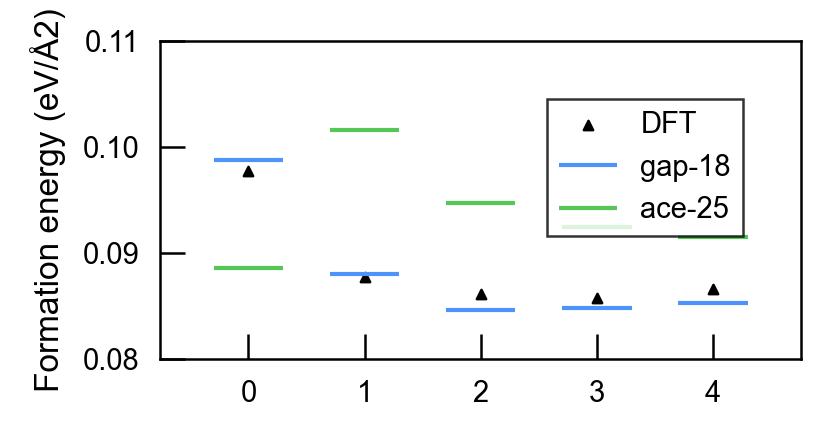

In [63]:
# conversion to J/m^2 *16.022

fig, axes = plt.subplots(1,1, figsize=(7*cm, 3.5*cm))
# fig, axes = plt.subplots(1,1, figsize=(4*cm, 4*cm), sharex=True)
surfaces=['3x3', '5x5', '7x7', '9x9']
names=['gap-18', 'ace-25']
colors=[ '#4E93FC', "#54C756"] #'#7C65A9',

axes.scatter(np.arange(0,5), np.asarray((dft_111_r, dft_3x3,dft_5x5,dft_7x7, dft_9x9))/16.022, color='k', label='DFT', marker='^', s=5)


offsets=np.arange(1,6)

for name, color in zip(names, colors):
    read_dictionary = np.load(f'../../data/paper/c-surfaces/Si/111/{name}-preds-Si111.npy',allow_pickle='TRUE').item()
    
    axes.hlines(read_dictionary['e111'], -0.3, 0.3, color=color, label=name)

    for gamma_en, offset in zip(read_dictionary['e_forms'], offsets):
        axes.hlines(gamma_en, offset-0.3, offset+0.3, color=color, label=name)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

axes.set_xticks(np.arange(5))
axes.set_yticks(np.arange(0.08,0.12, 0.01))
axes.set_ylim(bottom=0.08, top=0.11)
axes.set_ylabel('Formation energy (eV/Å2)')
plt.savefig('Si111_energies_v3.svg', dpi=300)